# UNDERSTANDING THE WAY TO GENERATE KPIS IN PANDAS

## GOALS

### Extract some KPIs from the Data. In this case will be:
### - PERCENTAGE of each GENDER
### - MEAN AGE by GENDER
### - MEAN of DAYS over SUBSCRIPTION TYPE
### - MEAN INCOME PER CLIENT over SUBSCRIPTION TYPE per YEAR
### - MEAN INCOME PER CLIENT over GENDER

In [47]:
# https://www.kaggle.com/datasets/gsagar12/dspp1?resource=download
# Last day: 2021-12-31

### LOADING THE DATA

Importing the needed libraries

In [48]:
import pandas as pd
import datetime

Creating a function to remove all the unnamed columns in the datasets.

In [49]:
def remove_unnamed_cols(df):
  df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
  return df

Creating a function to load the data directly from GOOGLE DRIVE.

In [50]:
def load_csv_from_drive(drive_url):
    url='https://drive.google.com/uc?id=' + drive_url.split('/')[-2]
    df = remove_unnamed_cols(pd.read_csv(url))
    return df

Loading the CUSTOMERs data to pandas dataframe.

In [51]:
customer_drive_url = 'https://drive.google.com/file/d/1VerQ3_t3S5UBoN-6qteiuuntAf3pShBv/view?usp=sharing'
customer_df = load_csv_from_drive(customer_drive_url)

Showing a sample of data to validate the columns.

In [52]:
customer_df.head(4)

,customer_id,age,gender
0,C2448,76,female
1,C2449,61,male
2,C2450,58,female
3,C2451,62,female


Applying **info** function to the dataframe to show types of the columns and the NULL values.

In [53]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508932 entries, 0 to 508931
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  508932 non-null  object
 1   age          508932 non-null  int64 
 2   gender       508932 non-null  object
dtypes: int64(1), object(2)
memory usage: 11.6+ MB


Loading the SUBSCRIPTIONs data to dataframe.

In [54]:
subscription_drive_url = 'https://drive.google.com/file/d/1x8Jm0iBnZoFQ-jNy4yklY4m2MRxD_wSw/view?usp=sharing'
subscription_df = load_csv_from_drive(subscription_drive_url)

Showing a sample of data to validate the columns.

In [55]:
subscription_df.head(2)

,customer_id,product,signup_date_time,cancel_date_time
0,C2448,prd_1,2017-01-01 10:35:09,NaN
1,C2449,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02


Applying **info** function to the dataframe to show types of the columns and the NULL values.

In [56]:
subscription_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508932 entries, 0 to 508931
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   customer_id       508932 non-null  object
 1   product           508932 non-null  object
 2   signup_date_time  508932 non-null  object
 3   cancel_date_time  112485 non-null  object
dtypes: object(4)
memory usage: 15.5+ MB


Loading the PRODUCTs data to dataframe.

In [57]:
product_drive_url = 'https://drive.google.com/file/d/1-X5KLVTf34OuxrnfN_Yb-Pbpw_Eo1dGl/view?usp=sharing'
product_df = load_csv_from_drive(product_drive_url)

Showing a sample of data to validate the columns.

In [58]:
product_df.head()

,product_id,name,price,billing_cycle
0,prd_1,annual_subscription,1200,12
1,prd_2,monthly_subscription,125,1


Applying **info** function to the dataframe to show types of the columns and the NULL values.

In [59]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     2 non-null      object
 1   name           2 non-null      object
 2   price          2 non-null      int64 
 3   billing_cycle  2 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 192.0+ bytes


### ANALIZING THE CUSTOMERS

#### Calculating the gender percentage

First, calculate the number of times that appears each category.

In [60]:
customer_df["gender"].value_counts()

male      309930
female    199002
Name: gender, dtype: int64

Second, create different variables with the total rows of the gender column and the total rows of each category.

In [61]:
m = customer_df["gender"].value_counts()["male"]
print(m)

309930


In [62]:
f = customer_df["gender"].value_counts()["female"]
print(f)

199002


In [63]:
total = customer_df.count()["customer_id"]
print(total)

508932


Third, divide the rows of each category by the total of the rows of the column gender and print the percentages.

In [64]:
perc_m = m / total
perc_f = f / total

print(f"""
% of males : {perc_m}
% of females: {perc_f}
""")


% of males : 0.608981160547971
% of females: 0.391018839452029



Fourth, do the same with a pandas function and print it.

In [65]:
customer_df["gender"].value_counts(normalize=True) * 100
#normalize=True calculates percentage of data

male      60.898116
female    39.101884
Name: gender, dtype: float64

Last, show the percentages in a pie chart.

<AxesSubplot:title={'center':'GENDER Percentages'}, ylabel='gender'>

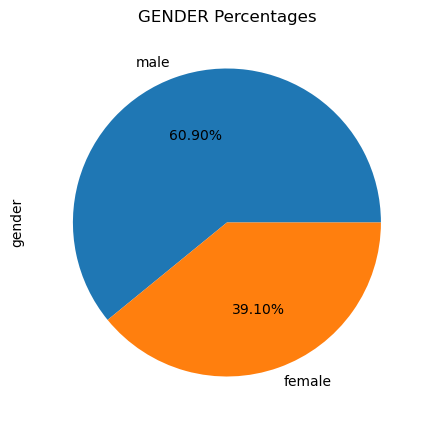

In [66]:
customer_df["gender"].value_counts() \
    .plot.pie(
        autopct = '%1.2f%%',
        title = "GENDER Percentages",
        figsize = (5, 5),
        fontsize = 10)

#### Calculating the mean age by gender

First, we want to calculate the mean age by gender via groupby and direct calculation of the mean.

In [67]:
customer_df.groupby(["gender"]).mean()

,age
gender,
female,58.340725
male,58.557981


Show me the data in a bar plot.

(58.0, 59.0)

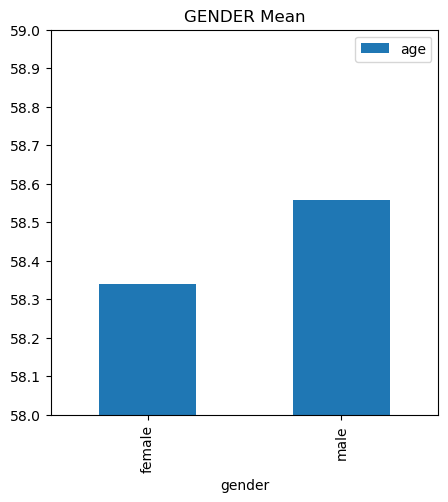

In [68]:
ax = customer_df.groupby(["gender"]).mean() \
    .plot.bar(
        title = "GENDER Mean",
        figsize = (5, 5),
        yticks = [x/10 for x in range(580, 600)])
ax.set_ylim(58, 59)

Can we calculate the median, mode, min and max by gender too?

In [69]:
customer_df.groupby(["gender"]).agg({
    "age": ["mean", "min", "max", "median", "std"]
})

age                         
             mean min max median       std
gender                                    
female  58.340725  21  78   59.0  8.496566
male    58.557981  22  78   59.0  8.098922

### ANALIZING THE SUBSCRIPTIONS

#### Calculating the mean days of subscription per product type

Changing the dates with object type to datetimes to work with.

In [70]:
subscription_df["signup_date_time"] = \
    pd.to_datetime(subscription_df["signup_date_time"])
subscription_df["cancel_date_time"] = \
    pd.to_datetime(subscription_df["cancel_date_time"])

In [71]:
subscription_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508932 entries, 0 to 508931
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   customer_id       508932 non-null  object        
 1   product           508932 non-null  object        
 2   signup_date_time  508932 non-null  datetime64[ns]
 3   cancel_date_time  112485 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 15.5+ MB


In [72]:
subscription_df.head(5)

,customer_id,product,signup_date_time,cancel_date_time
0,C2448,prd_1,2017-01-01 10:35:09,NaT
1,C2449,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02
2,C2450,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55
3,C2451,prd_2,2017-01-01 13:32:08,NaT
4,C2452,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01


In [73]:
subscription_df.head(2)

,customer_id,product,signup_date_time,cancel_date_time
0,C2448,prd_1,2017-01-01 10:35:09,NaT
1,C2449,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02


Understand the dates and substitute nulls if it is needed.  
*Tip: To substituite the nulls, the last day will be 2021-12-31.*

In [74]:
dt = datetime.datetime(year = 2021, month = 12, day = 31)
subscription_df

,customer_id,product,signup_date_time,cancel_date_time
0,C2448,prd_1,2017-01-01 10:35:09,NaT
1,C2449,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02
2,C2450,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55
3,C2451,prd_2,2017-01-01 13:32:08,NaT
4,C2452,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01
...,...,...,...,...
508927,C511375,prd_2,2021-12-31 18:37:58,NaT
508928,C511376,prd_2,2021-12-31 18:42:00,NaT
508929,C511377,prd_2,2021-12-31 18:50:53,NaT
508930,C511378,prd_2,2021-12-31 19:00:38,NaT


In [75]:
last_day_dt = datetime.datetime(
        year = 2021, month = 12, day = 31)
subscription_df['cancel_date_time'] = \
subscription_df['cancel_date_time'].fillna(last_day_dt)
subscription_df.head(2)

,customer_id,product,signup_date_time,cancel_date_time
0,C2448,prd_1,2017-01-01 10:35:09,2021-12-31 00:00:00
1,C2449,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02


Make a new column to show the difference between signup date and cancel_date in days

In [76]:
subscription_df['diff'] = subscription_df['cancel_date_time'] \
    - subscription_df['signup_date_time']

subscription_df["diff_days"] = subscription_df['diff'].dt.days.astype(int)
subscription_df.head()

,customer_id,product,signup_date_time,cancel_date_time,diff,diff_days
0,C2448,prd_1,2017-01-01 10:35:09,2021-12-31 00:00:00,1824 days 13:24:51,1824
1,C2449,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02,1707 days 22:20:33,1707
2,C2450,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55,742 days 04:42:55,742
3,C2451,prd_2,2017-01-01 13:32:08,2021-12-31 00:00:00,1824 days 10:27:52,1824
4,C2452,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01,1639 days 04:08:31,1639


In [77]:
subscription_df["diff_days"].describe()

count    508932.000000
mean        582.082372
std         425.204482
min          -1.000000
25%         238.000000
50%         504.000000
75%         857.000000
max        1824.000000
Name: diff_days, dtype: float64

Now, we want to calculate the mean days of subscription by product via groupby and direct calculation of the mean.

In [78]:
subscription_df.groupby(["product"]).mean()

,diff_days
product,
prd_1,660.457929
prd_2,442.828206


Show me the data in a bar plot with the name of the product.  
*Tip: first you need to join subscription dataframe with product dataframe*

#### Calculating the mean incomes per client by subscription type

In this case we want to join all the dataframes in one to calculate the incomes more easy. Join all the dataframes in one.

In [79]:
master_df = customer_df.merge(
    subscription_df, on = "customer_id").merge(
    product_df, left_on = "product", right_on = "product_id")
master_df.head(2)

,customer_id,age,gender,product,signup_date_time,cancel_date_time,diff,diff_days,product_id,name,price,billing_cycle
0,C2448,76,female,prd_1,2017-01-01 10:35:09,2021-12-31 00:00:00,1824 days 13:24:51,1824,prd_1,annual_subscription,1200,12
1,C2449,61,male,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02,1707 days 22:20:33,1707,prd_1,annual_subscription,1200,12


Delete all the columns that you dont need. And generate a new one with only the year:

In [80]:
master_df = master_df.drop(
    ["product", "product_id"],
    axis = 1) 
master_df.head(2)

,customer_id,age,gender,signup_date_time,cancel_date_time,diff,diff_days,name,price,billing_cycle
0,C2448,76,female,2017-01-01 10:35:09,2021-12-31 00:00:00,1824 days 13:24:51,1824,annual_subscription,1200,12
1,C2449,61,male,2017-01-01 11:39:29,2021-09-05 10:00:02,1707 days 22:20:33,1707,annual_subscription,1200,12


In [81]:
master_df["signup_date_time"] = \
    pd.to_datetime(master_df["signup_date_time"])
master_df["cancel_date_time"] = \
    pd.to_datetime(master_df["cancel_date_time"])
master_df.head(2)

,customer_id,age,gender,signup_date_time,cancel_date_time,diff,diff_days,name,price,billing_cycle
0,C2448,76,female,2017-01-01 10:35:09,2021-12-31 00:00:00,1824 days 13:24:51,1824,annual_subscription,1200,12
1,C2449,61,male,2017-01-01 11:39:29,2021-09-05 10:00:02,1707 days 22:20:33,1707,annual_subscription,1200,12


In [82]:
master_df["year"] = \
    master_df["signup_date_time"].dt.year
master_df.head(2)

,customer_id,age,gender,signup_date_time,cancel_date_time,diff,diff_days,name,price,billing_cycle,year
0,C2448,76,female,2017-01-01 10:35:09,2021-12-31 00:00:00,1824 days 13:24:51,1824,annual_subscription,1200,12,2017
1,C2449,61,male,2017-01-01 11:39:29,2021-09-05 10:00:02,1707 days 22:20:33,1707,annual_subscription,1200,12,2017


Now, we want to calculate the mean income per customer by product via groupby and aggregations.

In [83]:
master_df.groupby(["name", "year"]).agg(
    {"price": ["mean", "sum"]})

price           
                             mean        sum
name                 year                   
annual_subscription  2017  1200.0   30666000
                     2018  1200.0   55366800
                     2019  1200.0  100388400
                     2020  1200.0  109245600
                     2021  1200.0   95112000
monthly_subscription 2017   125.0     667625
                     2018   125.0    1495000
                     2019   125.0    3277375
                     2020   125.0    6825500
                     2021   125.0   10644875

Can you put in a simple line plot the sum over the years?

name
annual_subscription     AxesSubplot(0.125,0.11;0.775x0.77)
monthly_subscription    AxesSubplot(0.125,0.11;0.775x0.77)
Name: price, dtype: object

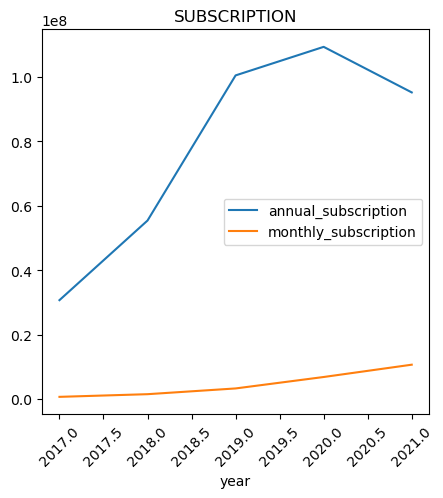

In [90]:
master_grp_df = master_df.groupby(["name", "year"]).sum().reset_index()
master_grp_df = master_grp_df.set_index('year')
master_grp_df.groupby('name')['price'].plot.line(
    legend=True, rot=45, 
    title="SUBSCRIPTION",
    figsize=(5, 5))

#### Calculating the mean incomes per client over gender

We need to calculate the mean income per customer by gender via groupby and aggregations.

<AxesSubplot:xlabel='gender'>

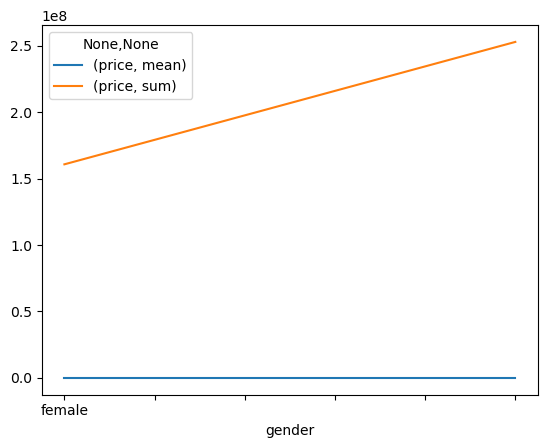

In [87]:
master_df.groupby(["gender"]).agg(
    {"price": ["mean", "sum"]}).plot.line()

Now, we want to plot it in a line plot, for that, i need to reindex and select only the mean.

Last, we can compare who subscribe more between gender over a pie chart.